In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [42]:
df = pd.read_csv('/content/Titanic.csv')

In [43]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
df['Survived'].value_counts() #выжившие 0-умер 1-выжил

,count
Survived,
0,549
1,342


In [45]:
df.isnull().sum() # пустые ячейки по столбцам

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
df.notnull().sum()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


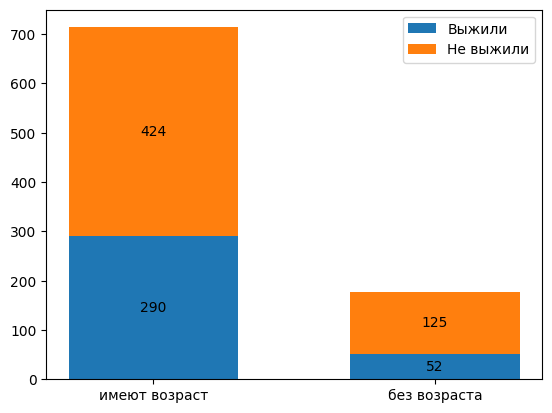

In [48]:
import numpy as np
#Повлияла ли смерть человека на утерю данных о возрасте

total_have_age = df.notnull().sum()['Age']
# len(df.loc[(df['Age'].notnull())])
total_notHave_age = len(df.loc[(df['Age'].isnull())])
have_age_survived = len(df.loc[(df['Age'].notnull() & (df[ 'Survived'] == 1))])
notHave_age_survived = len(df.loc[(df['Age'].isnull() & (df[ 'Survived'] == 1))])

#Визуализация
survivors_counts = {
'Выжили': [have_age_survived, notHave_age_survived],
'Hе выжили': [total_have_age-have_age_survived, total_notHave_age-notHave_age_survived]
}

fig, ax = plt.subplots()
bottom= np.zeros(2)

for key, count in survivors_counts.items():
    p = ax.bar(('имеют возраст', 'без возраста'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

# ax.set_title('Распределение выживших в зависимости от пола')
# ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

In [49]:
df['Age'].fillna(df['Age'].median(),inplace=True)#заполняет пустые поля вораста средним значением

<ipython-input-49-91739ddfa6b6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)#заполняет пустые поля вораста средним значением


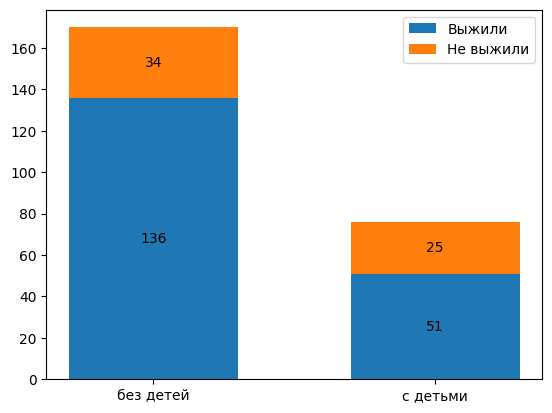

In [50]:
import numpy as np
#влияло ли выживание женщит от наличия у них детей

females_notchildren_total = len(df.loc[ (df ['Sex'] == 'female') & (df['Age'] > 18) & (df['Parch'] == 0)])
females_havechildren_total = len(df.loc[ (df ['Sex'] == 'female') & (df['Age'] > 18) & (df['Parch'] > 0)])
females_notchildren_survived = len(df.loc[ (df ['Sex'] == 'female') & (df['Age'] > 18) & (df['Parch'] == 0) & (df[ 'Survived'] == 1)])
females_havechildren_survived = len(df.loc[ (df ['Sex'] == 'female') & (df['Age'] > 18) & (df['Parch'] > 0) & (df[ 'Survived'] == 1)])

#Визуализация
survivors_counts = {
'Выжили': [females_notchildren_survived, females_havechildren_survived],
'Hе выжили': [females_notchildren_total-females_notchildren_survived, females_havechildren_total-females_havechildren_survived]
}

fig, ax = plt.subplots()
bottom= np.zeros(2)

for key, count in survivors_counts.items():
    p = ax.bar(('без детей', 'с детьми'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

# ax.set_title('Распределение выживших в зависимости от пола')
# ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

In [51]:
df.loc[ (df ['Sex'] == 'female') & (df['Age'] > 18) & (df['Parch'] > 0) & (df[ 'Survived'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,28.0,0,2,2678,15.2458,NaN,C
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.5500,NaN,S
229,230,0,3,"Lefebre, Miss. Mathilde",female,28.0,3,1,4133,25.4667,NaN,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S
312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,NaN,C
409,410,0,3,"Lefebre, Miss. Ida",female,28.0,3,1,4133,25.4667,NaN,S
423,424,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S


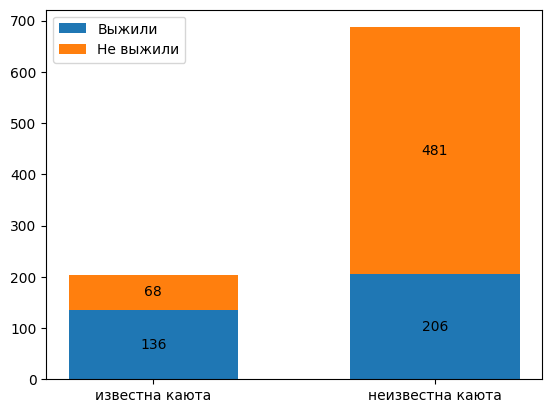

In [52]:
import numpy as np
#Проверка повлияла ли смерть человека на утерю данных каюты
total_have_сabin = df.notnull().sum()['Cabin']
total_notHave_сabin = len(df.loc[(df['Cabin'].isnull())])
have_сabin_survived = len(df.loc[(df['Cabin'].notnull() & (df[ 'Survived'] == 1))])
notHave_сabin_survived = len(df.loc[(df['Cabin'].isnull() & (df[ 'Survived'] == 1))])

survivors_counts = {
'Выжили': [have_сabin_survived, notHave_сabin_survived],
'Hе выжили': [total_have_сabin-have_сabin_survived, total_notHave_сabin-notHave_сabin_survived]
}

fig, ax = plt.subplots()
bottom= np.zeros(2)

for key, count in survivors_counts.items():
    p = ax.bar(('известна каюта', 'неизвестна каюта'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.legend()
plt.show()

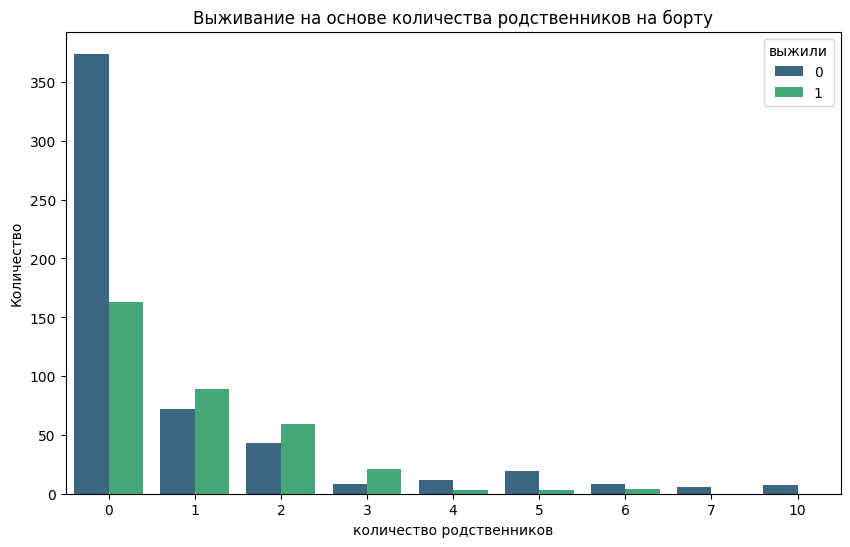

In [53]:
import seaborn as sns

df['Relatives'] = df['SibSp'] + df['Parch']

plt.figure(figsize=(10, 6))
relatives_survived = df.groupby(['Relatives', 'Survived']).size().reset_index(name='Count')
sns.barplot(x='Relatives', y='Count', hue='Survived', data=relatives_survived, palette='viridis')
plt.title('Выживание на основе количества родственников на борту')
plt.xlabel('количество родственников')
plt.ylabel('Количество')
plt.legend(title='выжили', loc='upper right')

plt.show()

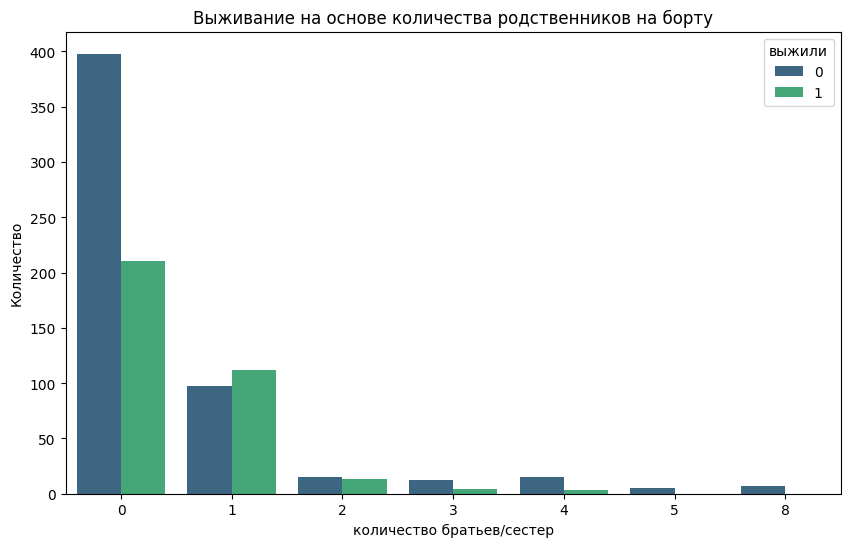

In [54]:
plt.figure(figsize=(10, 6))
relatives_survived = df.groupby(['SibSp', 'Survived']).size().reset_index(name='Count')
sns.barplot(x='SibSp', y='Count', hue='Survived', data=relatives_survived, palette='viridis')
plt.title('Выживание на основе количества родственников на борту')
plt.xlabel('количество братьев/сестер')
plt.ylabel('Количество')
plt.legend(title='выжили', loc='upper right')

plt.show()

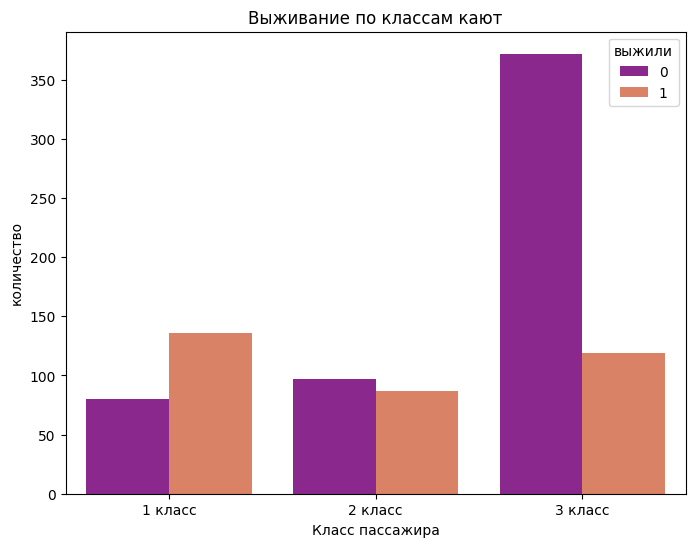

In [55]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette ='plasma')

# Set plot labels and title
plt.title('Выживание по классам кают')
plt.xlabel('Класс пассажира')
plt.ylabel('количество')
plt.xticks([0, 1, 2], ['1 класс', '2 класс', '3 класс'])
plt.legend(title='выжили', loc='upper right')

# Show plot
plt.show()

In [56]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

In [57]:
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [58]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [59]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2,1
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,1
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2,0
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,1
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2,0
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2,0
888,889,0,3,413,0,28.0,1,2,675,23.4500,147,2,3
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0,0


In [60]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [61]:
df['Age'].fillna(df['Age'].median(),inplace=True)#заполняет пустые поля вораста средним значением

<ipython-input-61-91739ddfa6b6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)#заполняет пустые поля вораста средним значением


In [62]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [63]:
X = df.drop(columns=['Survived', 'PassengerId'])
y = df['Survived']

In [64]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [65]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,3,108,1,22.0,1,0,523,7.2500,147,2,1
1,1,190,0,38.0,1,0,596,71.2833,81,0,1
2,3,353,0,26.0,0,0,669,7.9250,147,2,0
3,1,272,0,35.0,1,0,49,53.1000,55,2,1
4,3,15,1,35.0,0,0,472,8.0500,147,2,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,548,1,27.0,0,0,101,13.0000,147,2,0
887,1,303,0,19.0,0,0,14,30.0000,30,2,0
888,3,413,0,28.0,1,2,675,23.4500,147,2,3
889,1,81,1,26.0,0,0,8,30.0000,60,0,0


In [66]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


Modeling

In [67]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517,0.016639
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112,0.065997
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557,-0.036309
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057,-0.200988
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.014205,-0.245619
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654,0.890712
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322,0.783111
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041,0.064302
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226,0.217138


In [68]:
import numpy as np
np.var(df['Sex'])

0.22821808306282707

A100 - 2m

In [69]:
#feature_importances

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from tensorflow.keras.layers import Dropout


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
'''
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))'''
model = Sequential()
#добавление слоев и регуляризации весов ядер
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))# случайное отключение нейронов
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=13, batch_size=128, validation_split=0.2)

# Evaluate the model
loss_old, accuracy_old = model.evaluate(X_test, y_test)
print(f'Старая модель - Точность на тестовом наборе: {accuracy_old:.2f}')

Epoch 1/13


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.5183 - loss: 0.7007 - val_accuracy: 0.7273 - val_loss: 0.6269
Epoch 2/13
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6718 - loss: 0.6359 - val_accuracy: 0.7622 - val_loss: 0.5714
Epoch 3/13
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7175 - loss: 0.5933 - val_accuracy: 0.7762 - val_loss: 0.5266
Epoch 4/13
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7322 - loss: 0.5617 - val_accuracy: 0.8042 - val_loss: 0.4875
Epoch 5/13
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7658 - loss: 0.5153 - val_accuracy: 0.7972 - val_loss: 0.4551
Epoch 6/13
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7788 - loss: 0.4965 - val_accuracy: 0.8182 - val_loss: 0.4296
Epoch 7/13
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7893 - loss: 0.4665 - val_accuracy: 0.8392 - val_loss: 0.4106
Epoch 8/13
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8007 - loss: 0.4557 - val_accuracy: 0.8252 - val_loss: 0.4028
Epoch 9/13


.pkl .h5 .gguf

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8171 - loss: 0.4191 - val_accuracy: 0.8252 - val_loss: 0.3959
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8196 - loss: 0.4038 - val_accuracy: 0.8392 - val_loss: 0.4017
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8490 - loss: 0.3872 - val_accuracy: 0.8392 - val_loss: 0.4024
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8010 - loss: 0.4508 - val_accuracy: 0.8392 - val_loss: 0.4039
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8232 - loss: 0.4130 - val_accuracy: 0.8392 - val_loss: 0.4009
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8329 - loss: 0.4021 - val_accuracy: 0.8392 - val_loss: 0.4002
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8279 - loss: 0.3819 - val_accuracy: 0.8392 - val_loss: 0.4158
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8406 - loss: 0.3798 - val_accuracy: 0.8252 - val_loss:

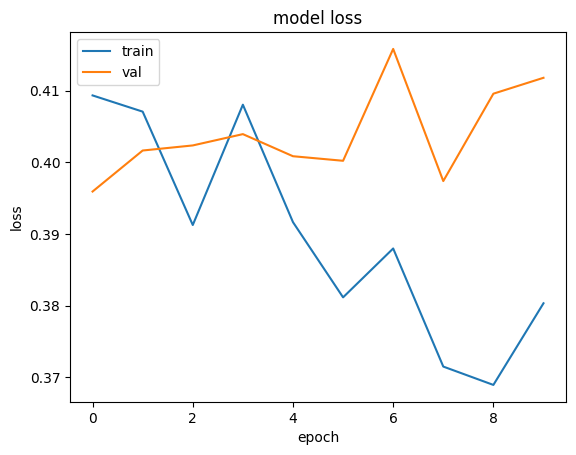

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
import joblib


# Новая модель с кросс-валидацией
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
fold = 1

# Кросс-валидация на 3 фолда
for train_index, val_index in kfold.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Стандартизация фолдов
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_val_fold = scaler.transform(X_val_fold)

    # Создание модели
    model_new = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_fold.shape[1],), kernel_regularizer=l2(0.4)),
        Dropout(0.2),
        Dense(64, activation='relu', kernel_regularizer=l2(0.6)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model_new.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Обучение
    model_new.fit(X_train_fold, y_train_fold, epochs=13, batch_size=128, validation_split=0.2, verbose=0)

    # Оценка модели на фолде
    y_pred_fold = (model_new.predict(X_val_fold) > 0.5).astype(int)
    print(f'\nФолд {fold} - Classification Report:\n{classification_report(y_val_fold, y_pred_fold)}')

    # Матрица ошибок
    cm = confusion_matrix(y_val_fold, y_pred_fold)
    tn, fp, fn, tp = cm.ravel()
    print(f"Фолд {fold} - Confusion Matrix:\n", cm)
    print(f"Модель предсказала, что погибнет, а по факту не погиб = {fp}")
    print(f"Модель предсказала, что выживет, а по факту выжил = {tn}")
    print(f"Модель предсказала, что выживет, а по факту погиб = {fn}")
    print(f"Модель предсказала, что погибнет, а по факту погиб = {tp}\n")

    fold += 1

# Evaluate the model
loss_new, accuracy_new = model_new.evaluate(X_test, y_test)
print(f'Новая модель - Точность на тестовом наборе: {accuracy_new:.2f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Фолд 1 - Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.98      0.79       183
           1       0.88      0.19      0.32       114

    accuracy                           0.68       297
   macro avg       0.77      0.59      0.55       297
weighted avg       0.75      0.68      0.61       297

Фолд 1 - Confusion Matrix:
 [[180   3]
 [ 92  22]]
Модель предсказала, что погибнет, а по факту не погиб = 3
Модель предсказала, что выживет, а по факту выжил = 180
Модель предсказала, что выживет, а по факту погиб = 92
Модель предсказала, что погибнет, а по факту погиб = 22



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Фолд 2 - Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       183
           1       0.76      0.41      0.53       114

    accuracy                           0.72       297
   macro avg       0.74      0.67      0.67       297
weighted avg       0.73      0.72      0.70       297

Фолд 2 - Confusion Matrix:
 [[168  15]
 [ 67  47]]
Модель предсказала, что погибнет, а по факту не погиб = 15
Модель предсказала, что выживет, а по факту выжил = 168
Модель предсказала, что выживет, а по факту погиб = 67
Модель предсказала, что погибнет, а по факту погиб = 47



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Фолд 3 - Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.98      0.81       183
           1       0.92      0.29      0.44       114

    accuracy                           0.72       297
   macro avg       0.80      0.64      0.63       297
weighted avg       0.78      0.72      0.67       297

Фолд 3 - Confusion Matrix:
 [[180   3]
 [ 81  33]]
Модель предсказала, что погибнет, а по факту не погиб = 3
Модель предсказала, что выживет, а по факту выжил = 180
Модель предсказала, что выживет, а по факту погиб = 81
Модель предсказала, что погибнет, а по факту погиб = 33

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7461 - loss: 23.5980 
Новая модель - Точность на тестовом наборе: 0.72


In [35]:
# Сохранение новой модели
model_loaded = joblib.dump(model_new, 'new-fully-connected-model.pkl')

In [36]:
#model_loaded = joblib.load('fully-connected-model.pkl')

In [37]:
#model_loaded.predict(X_test)

Пример хорошего графика

![image.png](attachment:0ce5707c-4979-4011-8cc9-31deae7755cb.png)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6936 - loss: 21.7650 - val_accuracy: 0.7692 - val_loss: 16.7219
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7396 - loss: 15.4162 - val_accuracy: 0.7762 - val_loss: 11.7762
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7295 - loss: 10.8588 - val_accuracy: 0.7692 - val_loss: 8.2509
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7840 - loss: 7.5951 - val_accuracy: 0.7692 - val_loss: 5.7692
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7539 - loss: 5.3388 - val_accuracy: 0.7832 - val_loss: 4.0437
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7832 - loss: 3.7243 - val_accuracy: 0.8252 - val_loss: 2.8604
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7783 - loss: 2.6755 - val_accuracy: 0.8112 - val_loss: 2.0594
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7636 - loss: 1.9450 - val_accuracy: 0.7902 - val_

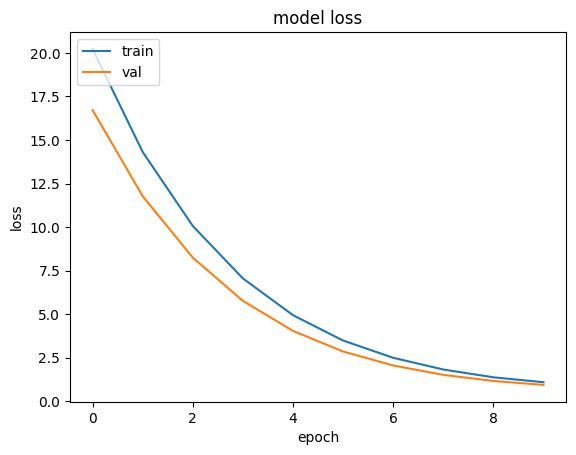

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model_new.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [39]:
# Find Outliers in DataFrame

import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5, 100],
    'B': [10, 12, 14, 13, 15, 200],
    'C': [5, 6, 7, 8, 9, 300]
}

df = pd.DataFrame(data)

# Function to find outliers
def find_outliers(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Get outliers
outliers = find_outliers(df)
print(outliers)

{'A':      A    B    C
5  100  200  300, 'B':      A    B    C
5  100  200  300, 'C':      A    B    C
5  100  200  300}


In [40]:
# Окончательный вывод
print("Сравнение моделей:")
print(f"Старая модель - точность на тестовом наборе: {accuracy_old:.2f}")
print(f"Новая модель - точность на тестовом наборе: {accuracy_new:.2f}")

# Выводы:
# У новой матрицы точность на тестовом наборе хуже, но график лучше
# Матрица ошибок показала, что модель имеет некоторые ошибки как по типу 'ложных срабатываний' (False Positive), так и 'ложных отрицательных' (False Negative) результатов.
# В кросс-валидационной модели ошибки удалось снизить за счет использования нескольких фолдов, что делает новую модель более устойчивой к переобучению.
# Новая модель продемонстрировала более стабильные результаты по сравнению с моделью без кросс-валидации.

Сравнение моделей:
Старая модель - точность на тестовом наборе: 0.81
Новая модель - точность на тестовом наборе: 0.72
